<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/coherence/focus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Focus
## David Brady
## University of Arizona
## August 2022

## libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})
from google.colab import files
from scipy.special import jn, jn_zeros


##  goals

show cross sections of the 3d impulse response under various conditions.
show the defocus transfer function for various systems
estimate acceptable values of defocus. 
discuss dynamic control


In [2]:
def jinc(x):
  # impulse response
  ji=2*jn(1,np.pi*(x+10**(-8)))/(np.pi*(x+10**(-8)))
  return ji
def pupil(x):
  p=1-np.heaviside(np.abs(x)-.5,0)
  return p
def B(u,v,q):
  # bandpass for u,v in units of A, q in units of A^2
  b=(2/(u**2+v**2))*np.real(np.emath.sqrt((u**2+v**2)-(u**2+v**2+2*np.abs(q))**2))
  return b
def H(u):
  # incoherent imaging transfer function for u in units of lambda f/#
  h=(2/np.pi)*np.real(np.emath.arccos(u)-u*np.emath.sqrt(1-u**2))
  return h

## impulse response in the presence of defocus

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

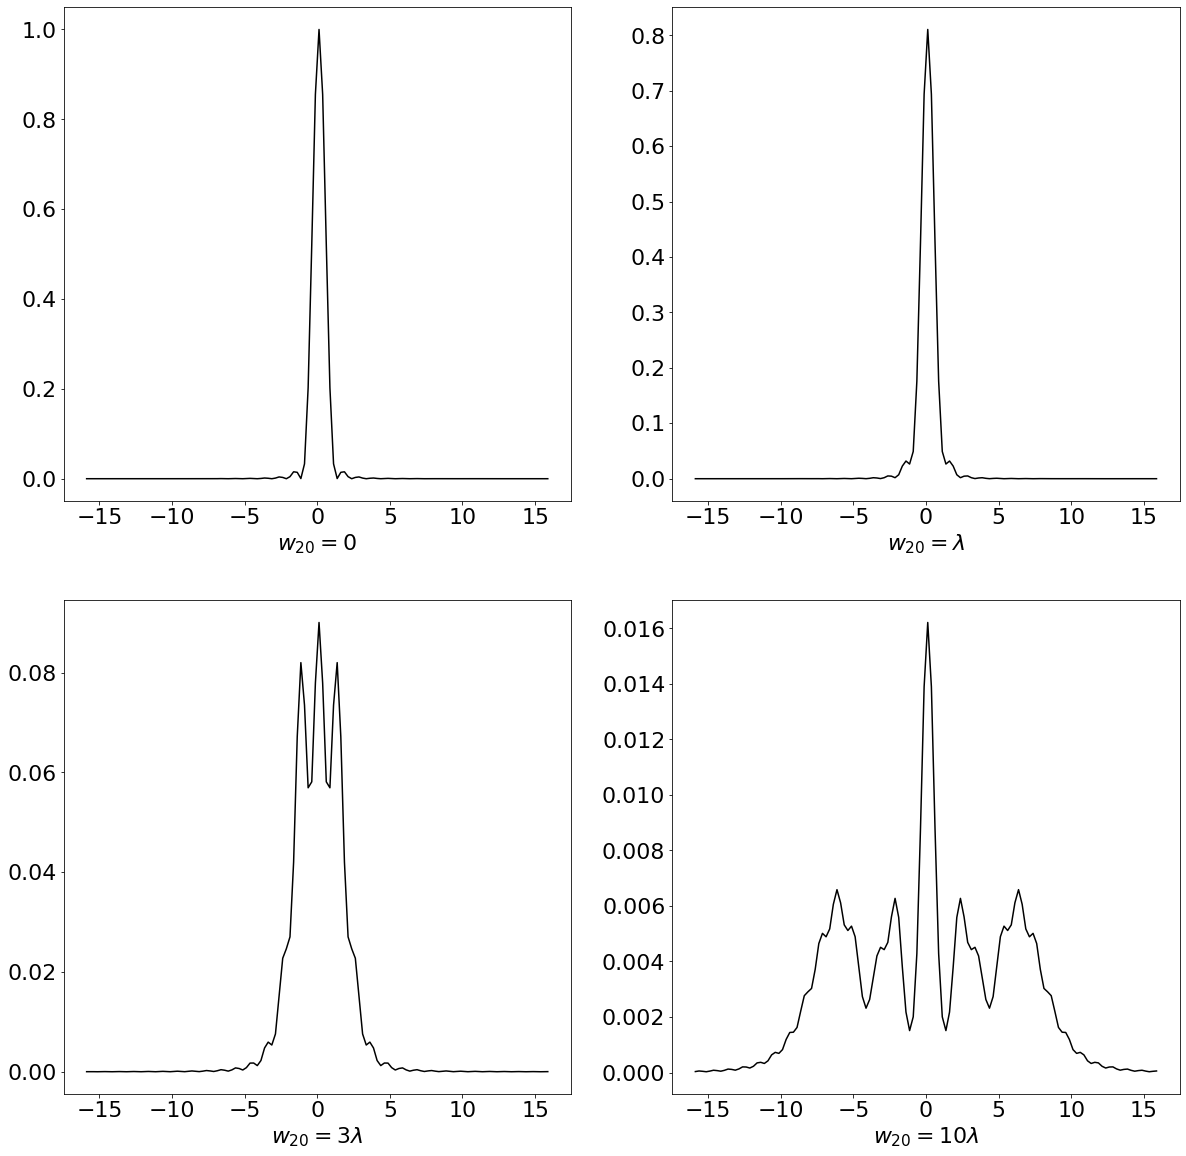

In [36]:
fig, ((ax1,ax2), (ax3,ax4))= plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [20, 20]
u = np.linspace(-2, 2, 2048)
U, V= np.meshgrid(u,u)
X=1/(2*(u[1]-u[0]))
x=np.linspace(-X,X,2048)
# no defocus
w=0
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024], 'k')
ax1.set_xlabel(r'$w_{20}=0$')
# one wave
w=1
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024], 'k')
ax2.set_xlabel(r'$w_{20}=\lambda $')
# 3 waves
w=3
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
impulse=impulse/m
ax3.plot(x[960:1088],impulse[960:1088,1024], 'k')
ax3.set_xlabel(r'$w_{20}=3 \lambda $')
# 10 waves
w=10
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
impulse=impulse/m
ax4.plot(x[960:1088],impulse[960:1088,1024], 'k')
ax4.set_xlabel(r'$w_{20}=10 \lambda $')
plt.savefig('defocusPSF.pdf')
files.download('defocusPSF.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

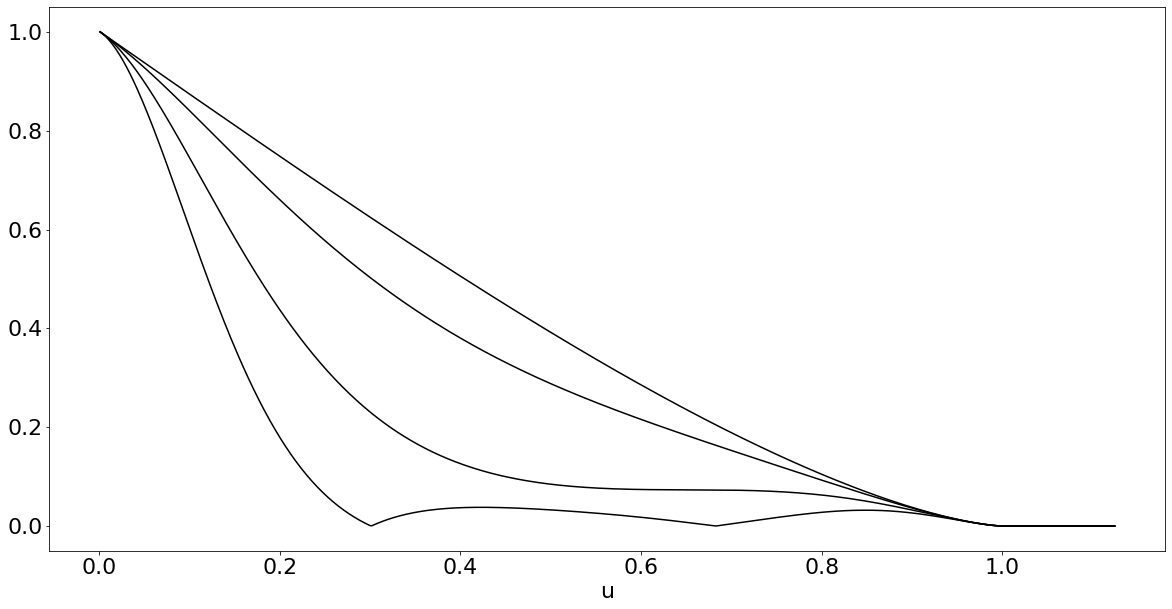

In [ ]:
fig, ax =plt.subplots()
plt.rcParams['figure.figsize'] = [20, 10]
u = np.linspace(-2, 2, 2048)
U, V= np.meshgrid(u,u)
X=1/(2*(u[1]-u[0]))
x=np.linspace(-X,X,2048)
# no defocus
w=0
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
# 1 wave
w=1
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
# 2 wave
w=2
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
# 3 wave
w=3
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
ax.set_xlabel('u')
fig.show()
plt.savefig('defocusMTF.pdf')
files.download('defocusMTF.pdf')

## Low diffraction beams

###logrithmic Asphere

\begin{equation}
  \phi(\rho )=\alpha \rho \log \left
  (\beta \rho\right )
\end{equation}

[]

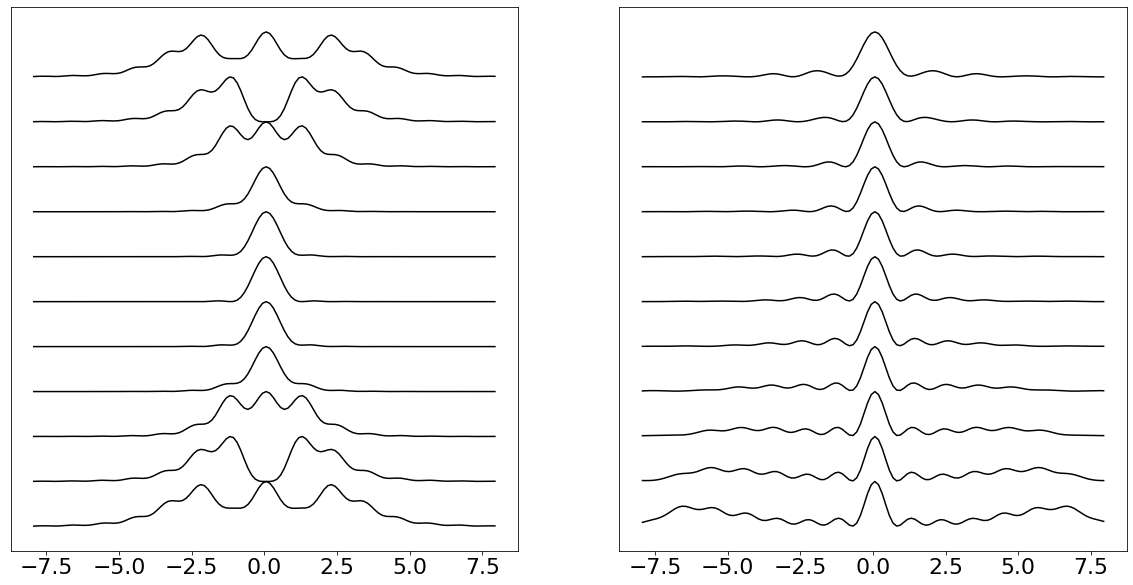

In [107]:
fig, (ax1,ax2)= plt.subplots(1,2)
u = np.linspace(-4, 4, 2048)
U, V= np.meshgrid(u,u)
X=1/(2*(u[1]-u[0]))
x=np.linspace(-X,X,2048)
pmod=pupil(np.sqrt(U**2+V**2))
## clear apeture
# no aspheric
w=-5
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-4
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-3
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-2
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-1
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=0
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=1
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=2
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=3
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=4
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=5
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax1.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
ax1.set_yticks([])
#
# now with a log asphere
alpha=100;beta=.5
pmod=pupil(np.sqrt(U**2+V**2))*np.exp(1j*alpha*np.sqrt(U**2+V**2)*np.log(beta*(np.sqrt(U**2+V**2)+1)))
w=-5
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-4
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-3
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-2
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=-1
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=0
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=1
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=2
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=3
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=4
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
w=5
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
m=np.max(impulse)
impulse=impulse/m
ax2.plot(x[960:1088],impulse[960:1088,1024]+w, 'k')
ax2.set_yticks([])
#plt.savefig('logDefocusPSF.pdf')
#files.download('logDefocusPSF.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

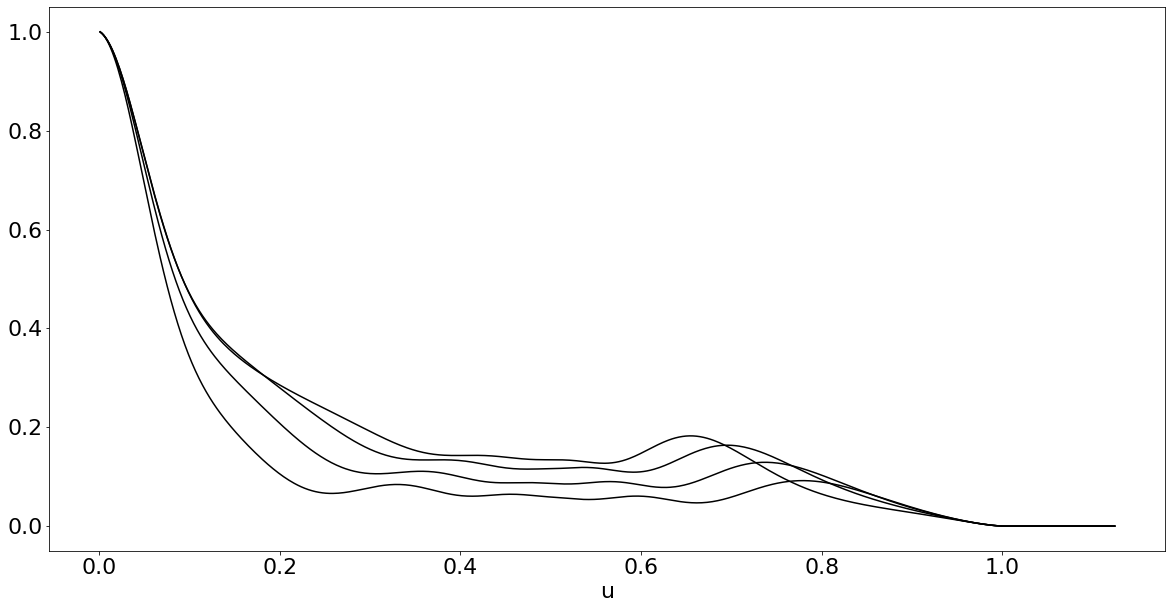

In [108]:
fig, ax =plt.subplots()
plt.rcParams['figure.figsize'] = [20, 10]
u = np.linspace(-2, 2, 2048)
U, V= np.meshgrid(u,u)
X=1/(2*(u[1]-u[0]))
x=np.linspace(-X,X,2048)
alpha=100;beta=.5
pmod=pupil(np.sqrt(U**2+V**2))*np.exp(1j*alpha*np.sqrt(U**2+V**2)*np.log(beta*(np.sqrt(U**2+V**2)+1)))
# no defocus
w=0
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
# 1 wave
w=1
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
# 3 wave
w=2
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
# 10 wave
w=3
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
ax.plot(u[1024:1600],OTF[1024,1024:1600], 'k')
ax.set_xlabel('u')
fig.show()
plt.savefig('logDefocusMTF.pdf')
files.download('logDefocusMTF.pdf')

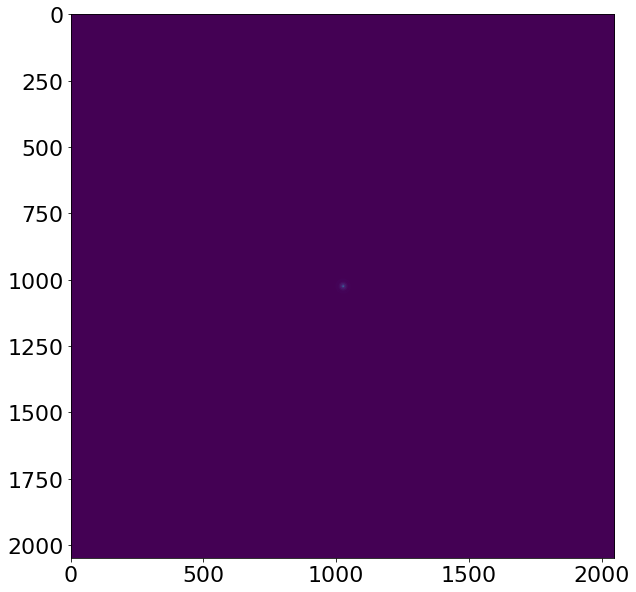

In [104]:
fig, ax =plt.subplots()
plt.rcParams['figure.figsize'] = [20, 10]
u = np.linspace(-2, 2, 2048)
U, V= np.meshgrid(u,u)
X=1/(2*(u[1]-u[0]))
x=np.linspace(-X,X,2048)
alpha=100;beta=.5
pmod=pupil(np.sqrt(U**2+V**2))*np.exp(1j*alpha*np.sqrt(U**2+V**2)*np.log(beta*(np.sqrt(U**2+V**2)+1)))
# no defocus
w=0
p=np.exp(2*np.pi*1j*w*(U**2+V**2))*pmod
impulse=np.abs(np.fft.fftshift(np.fft.fft2(p)))**2
OTF=np.abs(np.fft.fftshift(np.fft.ifft2(impulse)))
OTF=OTF/np.max(OTF)
plt.imshow(impulse)